Importing modules

In [21]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, ConvLSTM2D, MaxPooling2D, Dropout, TimeDistributed, Conv2D, Reshape, Embedding, Permute,UpSampling2D,RepeatVector
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import categorical_crossentropy, mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h2>Loading dataset</h2>

In [22]:
main_dir = "/fruit classification/dataset"
os.listdir(main_dir)

['test', 'train']

In [23]:
test_dir = main_dir + '/test'
os.listdir(test_dir)

['Apple Golden 1',
 'Apple Red 1',
 'Banana',
 'Guava',
 'Kiwi',
 'Mango',
 'Mango Red',
 'Orange',
 'Pineapple',
 'Watermelon']

In [24]:
train_dir =  main_dir + '/train'
os.listdir(train_dir)

['Apple Golden 1',
 'Apple Red 1',
 'Banana',
 'Guava',
 'Kiwi',
 'Mango',
 'Mango Red',
 'Orange',
 'Pineapple',
 'Watermelon']

<h2>Data generator for training and testing</br>
Train set</h2>

In [25]:
# Creating a data generator
train = ImageDataGenerator(
        rescale=1./255, 
        horizontal_flip = True, 
        vertical_flip = True, 
        validation_split = 0.2)
train_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'training')

val_datagen = train.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse',
        subset = 'validation')

# Printing the training set
train_labels = (train_datagen.class_indices)
print(train_labels)

Found 3824 images belonging to 10 classes.
Found 954 images belonging to 10 classes.
{'Apple Golden 1': 0, 'Apple Red 1': 1, 'Banana': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Mango Red': 6, 'Orange': 7, 'Pineapple': 8, 'Watermelon': 9}


<h2>Test set</h2>

In [26]:
# Create a data generator
test_datagen = ImageDataGenerator(
  rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True
)
test_datagen = test_datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(128,128),
        class_mode='sparse')

# Printing the test set
test_labels = (test_datagen.class_indices)
print(test_labels)

Found 1603 images belonging to 10 classes.
{'Apple Golden 1': 0, 'Apple Red 1': 1, 'Banana': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Mango Red': 6, 'Orange': 7, 'Pineapple': 8, 'Watermelon': 9}


<h2>Image configuration</h2>

In [27]:
for image_batch, label_batch in train_datagen:
    break
image_batch.shape, label_batch.shape

((32, 128, 128, 3), (32,))

<h2>Building model</h2>

In [28]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), 
                 padding='same',
                 input_shape=(128,128,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size = (3,3), 
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size = (3,3), 
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

<h2>Compiling the model</h2>

In [29]:
model.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

<h2>Training model</h2>

In [30]:
trained_model = model.fit(train_datagen, epochs=20, 
                          batch_size = 32, 
                          validation_data = val_datagen, verbose = 1)

Epoch 1/20
120/120 [==============================] - 68s 564ms/step - loss: 1.6073 - accuracy: 0.3980 - val_loss: 0.3039 - val_accuracy: 0.9969
Epoch 2/20
120/120 [==============================] - 69s 571ms/step - loss: 0.5028 - accuracy: 0.8232 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 3/20
120/120 [==============================] - 60s 498ms/step - loss: 0.2010 - accuracy: 0.9283 - val_loss: 0.0243 - val_accuracy: 0.9937
Epoch 4/20
120/120 [==============================] - 62s 522ms/step - loss: 0.1479 - accuracy: 0.9459 - val_loss: 6.5363e-05 - val_accuracy: 1.0000
Epoch 5/20
120/120 [==============================] - 71s 593ms/step - loss: 0.0910 - accuracy: 0.9699 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 6/20
120/120 [==============================] - 73s 608ms/step - loss: 0.1022 - accuracy: 0.9663 - val_loss: 0.0023 - val_accuracy: 0.9990
Epoch 7/20
120/120 [==============================] - 84s 701ms/step - loss: 0.0746 - accuracy: 0.9752 - val_loss: 5.7736e-05 

<h2>saving model</h2>

In [31]:
model_dir = '/Fruit Classification/Model/model1.h5'
model.save(model_dir)

In [32]:
from tensorflow import keras
model = keras.models.load_model(model_dir)

<h2>Testing model</h2>

Accuracy: 99.99996423721313%
Output: Apple Red 1


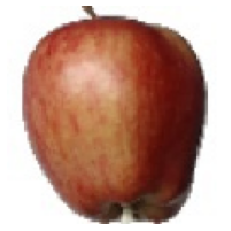

In [36]:
#test 1

from tensorflow.keras.preprocessing import image
import numpy as np
test_img = test_dir + '/Apple Red 1/33_100.jpg'
img = image.load_img(test_img, target_size = (128,128))
img_array = image.img_to_array(img)
img_array = np.array(img_array)/255.0

# Getting the labels
labels = dict((value,key) for key, value in train_labels.items())
predictions = model.predict(img_array[np.newaxis, ...])

# Displaying the output
acc = np.max(predictions[0]) * 100
print(f'Accuracy: {acc}%')
result = labels[np.argmax(predictions[0], axis = -1)]
print(f'Output: {result}')

plt.axis('off')
plt.imshow(img)

Accuracy: 100.0%
Output: Orange


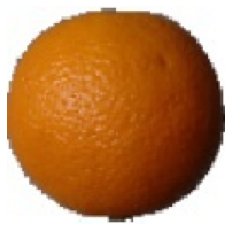

In [37]:
#test 2

from tensorflow.keras.preprocessing import image
import numpy as np
test_img = test_dir + '/Orange/6_100.jpg'
img = image.load_img(test_img, target_size = (128,128))
img_array = image.img_to_array(img)
img_array = np.array(img_array)/255.0

# Getting the labels
labels = dict((value,key) for key, value in train_labels.items())
predictions = model.predict(img_array[np.newaxis, ...])

# Displaying the output
acc = np.max(predictions[0]) * 100
print(f'Accuracy: {acc}%')
result = labels[np.argmax(predictions[0], axis = -1)]
print(f'Output: {result}')

plt.axis('off')
plt.imshow(img)

<h2>Evaluating result</h2>

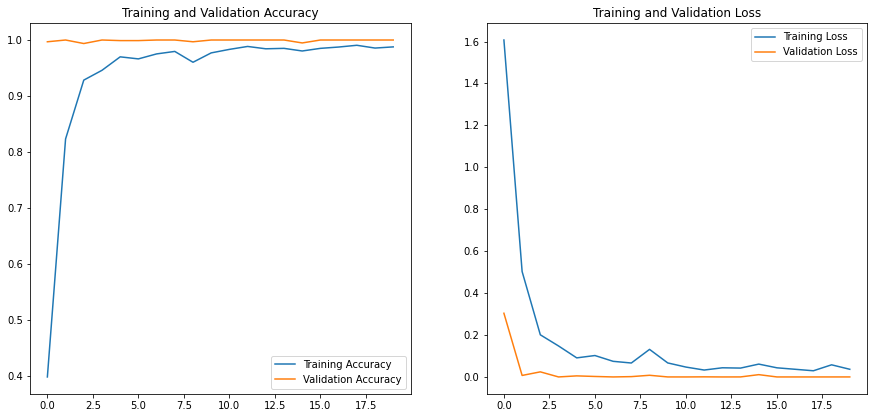

In [38]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()